In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df = pd.read_csv(r'E:\PSYLIQ INTERNSHIP(Python-R)\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# number of rows and columns
df.shape

(891, 12)

In [4]:
# missing values in each columns
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

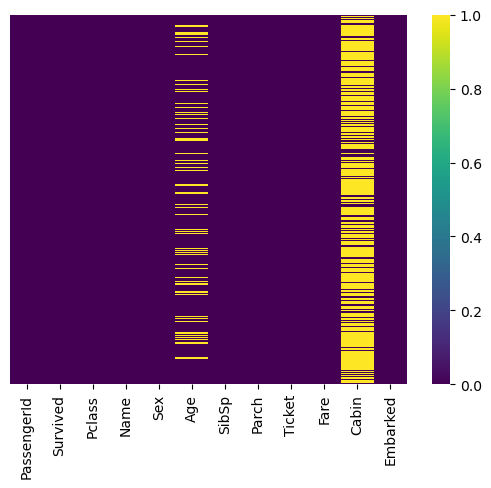

In [5]:
# Plot for better visualization of missing values in our dataset
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [6]:
# removing "Cabin" column from dataframe
df = df.drop(columns = 'Cabin',axis=1)

In [7]:
# replacing missing values in "Age" column with mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
# replacing missing values in "Embarked" column with mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
# some statistical measure about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


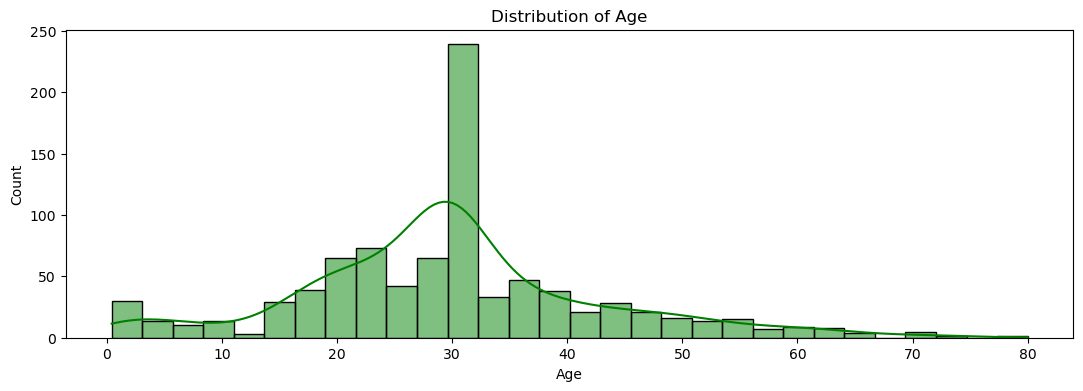

In [12]:
# Age distribution
plt.figure(figsize=(13,4))
sns.histplot(x='Age', bins=30, kde=True, data=df,color='g')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

- Most of the people are between 20yrs to 30yrs of age group

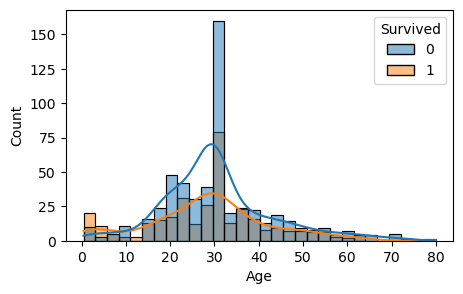

In [69]:
# Plotting survived and not survived based on Age
plt.figure(figsize=(5,3))
sns.histplot(x='Age',hue= 'Survived',data=df,kde=True)
plt.show()

In [59]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

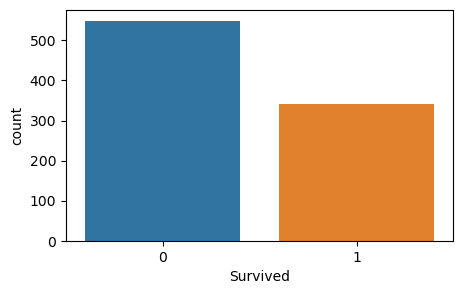

In [55]:
# Data Visualization
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=df)
plt.show()

-  Total 342 people survived  out of 891 

In [15]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

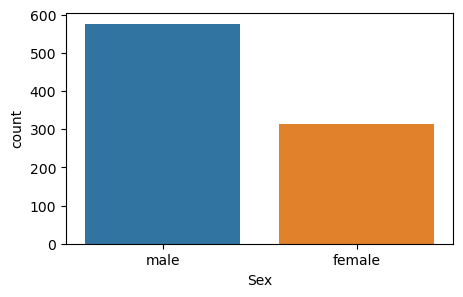

In [16]:
# countplot for "Sex" column
plt.figure(figsize=(5,3))
sns.countplot(x='Sex',data=df)
plt.show()

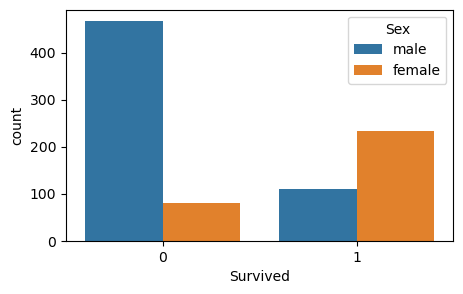

In [17]:
# number of people survived based on "Sex"
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',hue ='Sex', data=df)
plt.show()

- Around 100 males and 200 females were survived in accident

In [18]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

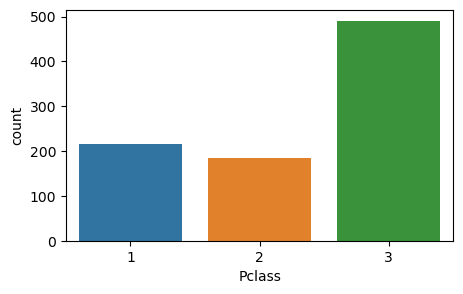

In [70]:
# countplot for Pclass column
plt.figure(figsize =(5,3))
sns.countplot(x='Pclass',data=df)
plt.show()

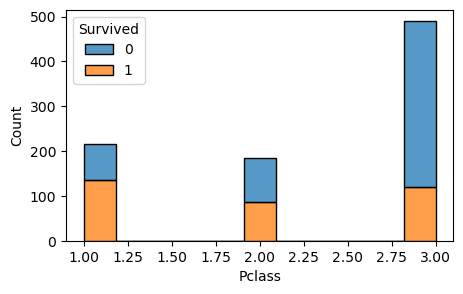

In [62]:
# number of people survived based on "Pclass"
plt.figure(figsize=(5,3))
sns.histplot(x='Pclass',hue='Survived',data=df,multiple="stack")
plt.show()

- Even though more people are in 3rd class but more no. of people were saved from 1st class.

# Encoding categorical columns

In [22]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
# Converting categorical columns to numerical columns
df.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [25]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0


In [26]:
# Correlation matrix
df = df.drop(columns = ['Name','Ticket','PassengerId'])

In [27]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0


In [28]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


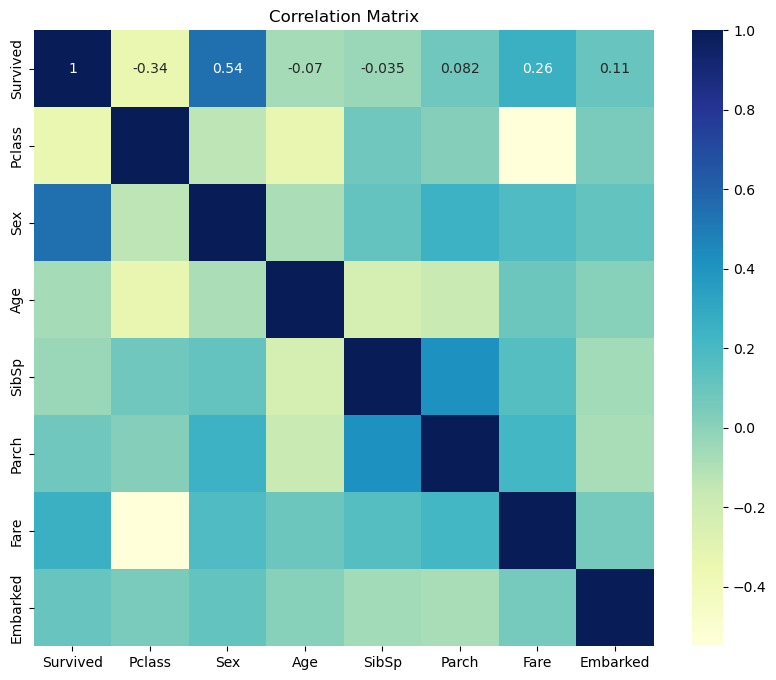

In [29]:
# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

-  Inference from the above corr matrix : 
1. There exists a weak negative correlation between Age and Survived. This implies that the higher the age, the lesser the chance of survival.
2. There is a weak positive correlation between Fare and Survived. This implies that the larger the fare, slightly higher the chance of survival for       the members.

# Seperating features and target

In [30]:
x = df.drop(columns='Survived',axis=1) # features
y = df['Survived'] # target variable

In [31]:
x , y

(     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 0         3    0  22.000000      1      0   7.2500         0
 1         1    1  38.000000      1      0  71.2833         1
 2         3    1  26.000000      0      0   7.9250         0
 3         1    1  35.000000      1      0  53.1000         0
 4         3    0  35.000000      0      0   8.0500         0
 ..      ...  ...        ...    ...    ...      ...       ...
 886       2    0  27.000000      0      0  13.0000         0
 887       1    1  19.000000      0      0  30.0000         0
 888       3    1  29.699118      1      2  23.4500         0
 889       1    0  26.000000      0      0  30.0000         1
 890       3    0  32.000000      0      0   7.7500         2
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=4)

In [90]:
x.shape, x_train.shape, y_train.shape

((891, 7), (712, 7), (712,))

In [91]:
# Model
model = LogisticRegression()

In [92]:
# training the logistic regression model with training dataset
model.fit(x_train, y_train)

LogisticRegression()

In [98]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

# Model Evaluation
- Accuracy score

In [133]:
model.score(x_test,y_test)

0.8212290502793296